In [1]:
# Import necessary modules

import numpy as np
import math
import matplotlib.pyplot as plt
import random
from matplotlib import cm

plt.style.use('seaborn-v0_8-bright')

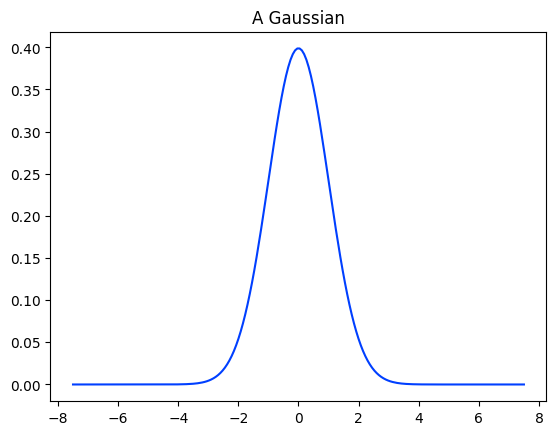

In [2]:
# Define Gaussian Function

def Gaussian(x, mu, sigma, A):
    return A*(1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*(((x - mu)/sigma)**2))

xx = np.linspace(-7.5,7.5,200)
yy = Gaussian(xx, 0, 1, 1)

plt.plot(xx,yy)
plt.title('A Gaussian')
plt.show()

# Numerical Integration Methods

## Quadrature Methods

In [3]:
# Extended Trapezoidal Method

def Extended_Trapezoidal(func, x_range, samples, params):
    ''' 
    func - function being numerically integrated
    x_range - the range considered; input as a tuple (low, high)
    samples - number of samples, so therefore the resolution of the integration
    params - the parameters necessary for the function called; input as a list
    '''
    x = np.linspace(x_range[0],x_range[1], samples) # create evenly spaces x values
    y = func(x, *params)
    h = (x_range[1] - x_range[0])/samples # height of each step
    area = []
    for i in range(samples):
        if i == 0 or i == samples-1:
            area.append(0.5 * y[i])
        else:
            area.append(y[i])
    #print('error function:', math.erf(sum(area)*h))
    return sum(area)*h
 
print('The true value expected is 0.5.')
print('For Extended Trapezoidal Method with', 100, 'samples, the calculated area is', Extended_Trapezoidal(Gaussian, (0,150), 100, [0,1,1]))
print('For Extended Trapezoidal Method with', 10000, 'samples, the calculated area is', Extended_Trapezoidal(Gaussian, (0,150), 10000, [0,1,1]))

The true value expected is 0.5.
For Extended Trapezoidal Method with 100 samples, the calculated area is 0.4951825567106224
For Extended Trapezoidal Method with 10000 samples, the calculated area is 0.4999499999999988


In [4]:
# Extended Simpson's Method

def Extended_Simpsons(func, x_range, samples, params):
    ''' 
    func - function being numerically integrated
    x_range - the range considered; input as a tuple (low, high)
    samples - number of samples, so therefore the resolution of the integration
    params - the parameters necessary for the function called; input as a list
    '''
    x = np.linspace(x_range[0],x_range[1], samples) # create evenly spaces x values
    y = func(x, *params)
    h = (x_range[1] - x_range[0])/samples # height of each step
    area = []
    for i in range(samples):
        if i == 0 or i == samples-1:
            area.append(y[i])
        elif i%2 == 0: # even
            area.append(2 * y[i])
        else:
            area.append(4 * y[i])
    #print('error function:', math.erf(sum(area)*(h/3)))
    return sum(area)*(h/3)

print('The true value expected is 0.5.')
print('For Extended Simpson\'s Method with', 100, 'samples, the calculated area is', Extended_Simpsons(Gaussian, (0,150), 100, [0,1,1]))
print('For Extended Simpson\'s Method with', 10000, 'samples, the calculated area is', Extended_Simpsons(Gaussian, (0,150), 10000, [0,1,1]))

The true value expected is 0.5.
For Extended Simpson's Method with 100 samples, the calculated area is 0.4567273981450303
For Extended Simpson's Method with 10000 samples, the calculated area is 0.49995


In [5]:
# Mid-Point Method

def Midpoint(func, x_range, samples, params):
    ''' 
    func - function being numerically integrated
    x_range - the range considered; input as a tuple (low, high)
    samples - number of samples, so therefore the resolution of the integration
    params - the parameters necessary for the function called; input as a list
    '''
    x = np.linspace(x_range[0],x_range[1], samples) # create evenly spaces x values
    h = (x_range[1] - x_range[0])/samples # height of each step
    x_mid = [i + h for i in x]
    y = [func(i, *params) for i in x_mid]
    area = []
    for i in range(samples):
        area.append(y[i])
    #print('error function:', math.erf(sum(area)*h))
    return sum(area)*h

print('The true value expected is 0.5.')
print('For Mid-Point Method with', 100, 'samples, the calculated area is', Midpoint(Gaussian, (0,150), 100, [0,1,1]))
print('For Mid-Point Method with', 10000, 'samples, the calculated area is', Midpoint(Gaussian, (0,150), 10000, [0,1,1]))

The true value expected is 0.5.
For Mid-Point Method with 100 samples, the calculated area is 0.20064894683299273
For Mid-Point Method with 10000 samples, the calculated area is 0.4969585312991903


## Evaluation of the accuracies of the quadrature methods

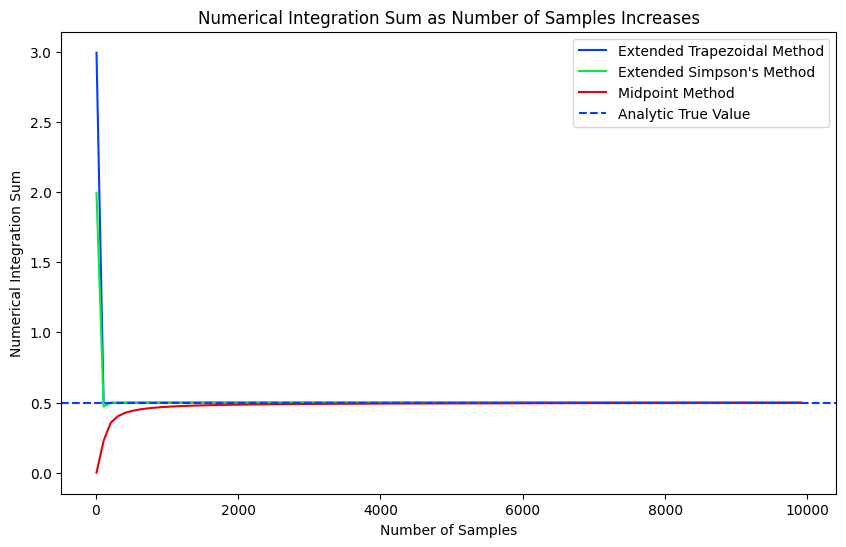

In [6]:
#
x_range = (0,150)
mu = 0
sigma = 1
amp = 1
samples = [i for i in range(10, 10000, 100)]

trapezium = [Extended_Trapezoidal(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]

simpsons = [Extended_Simpsons(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]

midpoint = [Midpoint(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]

plt.figure(figsize = (10,6))
plt.plot(samples, trapezium, label = 'Extended Trapezoidal Method')
plt.plot(samples, simpsons, label = 'Extended Simpson\'s Method')
plt.plot(samples, midpoint, label = 'Midpoint Method')
plt.axhline(y = 0.5, linestyle = '--', label = 'Analytic True Value')
plt.xlabel('Number of Samples')
plt.ylabel('Numerical Integration Sum')
plt.legend()
plt.title('Numerical Integration Sum as Number of Samples Increases')
plt.show()


## Monte Carlo Integration

In [7]:
def Monte_Carlo_Integration_Gaussian(N, x_range, params): # give both ranges as tuples, with the low lim first
    vals = []
    counter = 0
    while counter < N:
        x = random.uniform(x_range[0],x_range[1])
        vals.append(Gaussian(x,*params))
        counter += 1
    area = ((x_range[1] - x_range[0])*sum(vals))/N
    mean_f = sum(vals)/N
    error_sum = [(i - mean_f)**2 for i in vals]
    sample_variance = sum(error_sum)/(N-1)
    error = ((x_range[1] - x_range[0])*np.sqrt(sample_variance))/np.sqrt(N)
    return area, error

print('The true value expected is 0.5.')
area, error = Monte_Carlo_Integration_Gaussian(N = 10000, x_range = (0,10), params = [0,1,1])

print('The area calculated by Monte Carlo Integration is', area, 'with an associated error of', error)

The true value expected is 0.5.
The area calculated by Monte Carlo Integration is 0.5046419086845019 with an associated error of 0.010806316680595087


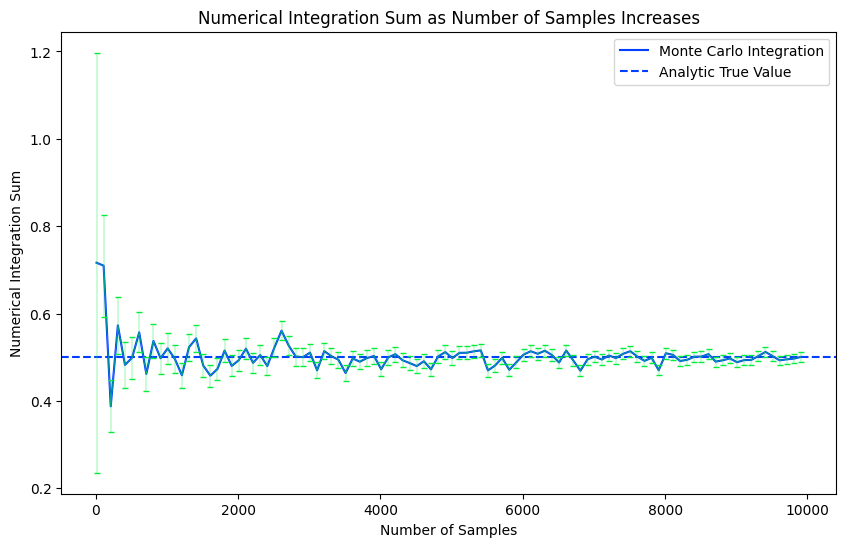

In [8]:
MC = [Monte_Carlo_Integration_Gaussian(i, x_range = (0,10), params = [0,1,1]) for i in samples]
MC_val = [i[0] for i in MC]
MC_error = [i[1] for i in MC]

plt.figure(figsize = (10,6))
plt.plot(samples, MC_val, label = 'Monte Carlo Integration')
plt.axhline(y = 0.5, linestyle = '--', label = 'Analytic True Value')
plt.errorbar(samples, MC_val, yerr = MC_error, lw = 0.3, capsize = 2)
plt.title('Numerical Integration Sum as Number of Samples Increases')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Numerical Integration Sum')
plt.show()

### ODE integration methods appear to be identical to numerical methods we have explored above.

## Consider integrating only the desired range
### For this part of the investigation, we will only consider the normalised standard gaussian, and integrating that in the x limit of 0 < x < 1

In [24]:
# Direct integration: from 0 to 1

x_range = (0,1)
mu = 0
sigma = 1
amp = 1
samples = [i for i in range(10, 15000, 10)]

#True value using math.erf(), look in notpad for analytic derivation of this
true_val = 0.5*math.erf(1/np.sqrt(2))

trapezium = [Extended_Trapezoidal(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]
t_err = [abs(i - true_val)*100/true_val for i in trapezium]

simpsons = [Extended_Simpsons(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]
s_err = [abs(i - true_val)*100/true_val for i in simpsons]

midpoint = [Midpoint(Gaussian, x_range, i, [mu, sigma, amp]) for i in samples]
m_err = [abs(i - true_val)*100/true_val for i in midpoint]

MC = [Monte_Carlo_Integration_Gaussian(i, x_range = (0,1), params = [0,1,1]) for i in samples]
MC_val = [i[0] for i in MC]
MC_error = [i[1] for i in MC]
mc_err = [abs(i - true_val)*100/true_val for i in MC_val]

plt.figure(figsize = (10,6))
plt.plot(samples, trapezium, label = 'Extended Trapezoidal Method')
plt.plot(samples, simpsons, label = 'Extended Simpson\'s Method')
plt.plot(samples, midpoint, label = 'Midpoint Method')
plt.plot(samples, MC_val, label = 'Monte Carlo Integration')
plt.axhline(y = true_val, linestyle = '--', label = 'Analytic True Value')
plt.xlabel('Number of Samples')
plt.ylabel('Numerical Integration Sum')
plt.legend()
plt.title('Numerical Integration of the Gaussian $N(0,1)$ in range $0 \leq x \leq 1$ by Direct Integration')
plt.show()

plt.figure(figsize = (10,6))
plt.plot(samples, t_err, label = 'Extended Trapezoidal Method')
plt.plot(samples, s_err, label = 'Extended Simpson\'s Method')
plt.plot(samples, m_err, label = 'Midpoint Method')
plt.plot(samples, mc_err, label = 'Monte Carlo Integration')
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Deviation from True Value / %')
plt.yscale('log')
plt.legend()
plt.title('Error of Numerical Integration Methods of $N(0,1)$ in range $0 \leq x \leq 1$ by Direct Integration')
plt.show()

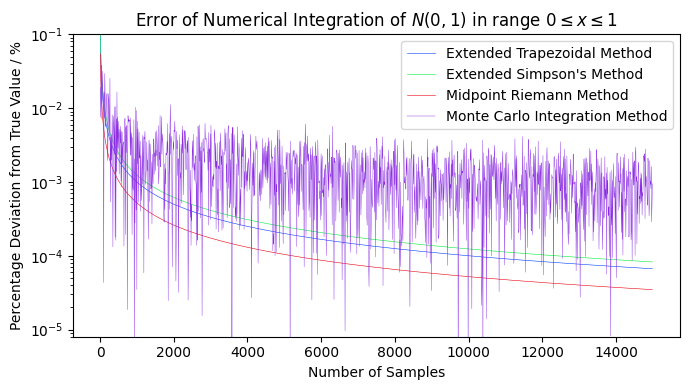

In [25]:
plt.figure(figsize = (7,4))
plt.plot(samples, np.array(t_err)/100, lw = 0.4, label = 'Extended Trapezoidal Method')
plt.plot(samples, np.array(s_err)/100, lw = 0.4, label = 'Extended Simpson\'s Method')
plt.plot(samples, np.array(m_err)/100, lw = 0.4, label = 'Midpoint Riemann Method')
plt.plot(samples, np.array(mc_err)/100, lw = 0.3, label = 'Monte Carlo Integration Method')
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Deviation from True Value / %')
plt.yscale('log')
plt.ylim(8e-6, 1e-1)
plt.legend()
plt.title('Error of Numerical Integration of $N(0,1)$ in range $0 \leq x \leq 1$')
plt.tight_layout()
plt.savefig('Error of Numerical Integration of N(0,1) by Direct Integration')
plt.show()

In [10]:
# Indirect integration: from 0 to 1, by considering 0 to infinity and 1 to infinity

#x_range = (0,1)
mu = 0
sigma = 1
amp = 1
samples = [i for i in range(10, 10000, 10)]

#True value using math.erf(), look in notpad for analytic derivation of this
true_val = 0.5*math.erf(1/np.sqrt(2))

trapezium_h = [Extended_Trapezoidal(Gaussian, (0,6), i, [mu, sigma, amp]) for i in samples]
trapezium_l = [Extended_Trapezoidal(Gaussian, (1,6), i, [mu, sigma, amp]) for i in samples]

trapezium = [trapezium_h[i]-trapezium_l[i] for i in range(len(trapezium_h))]
t_err_i = [abs(i - true_val)/true_val for i in trapezium]

print('Trapezium Done')

simpsons_h = [Extended_Simpsons(Gaussian, (0,6), i, [mu, sigma, amp]) for i in samples]
simpsons_l = [Extended_Simpsons(Gaussian, (1,6), i, [mu, sigma, amp]) for i in samples]

simpsons = [simpsons_h[i]-simpsons_l[i] for i in range(len(simpsons_h))]
s_err_i = [abs(i - true_val)/true_val for i in simpsons]

print('Simpsons Done')

midpoint_h = [Midpoint(Gaussian, (0,6), i, [mu, sigma, amp]) for i in samples]
midpoint_l = [Midpoint(Gaussian, (1,6), i, [mu, sigma, amp]) for i in samples]

midpoint = [midpoint_h[i]-midpoint_l[i] for i in range(len(midpoint_h))]
m_err_i = [abs(i - true_val)*100/true_val for i in midpoint]

print('Midpoint Done')

mc_h = [Monte_Carlo_Integration_Gaussian(i, x_range = (0,6), params = [0,1,1])[0] for i in samples]
mc_l = [Monte_Carlo_Integration_Gaussian(i, x_range = (1,6), params = [0,1,1])[0] for i in samples]

mc = [mc_h[i] - mc_l[i] for i in range(len(mc_h))]
mc_err_i = [abs(i - true_val)/true_val for i in mc]

print('MC Done')


plt.figure(figsize = (10,6))
plt.plot(samples, trapezium, label = 'Extended Trapezoidal Method')
plt.plot(samples, simpsons, label = 'Extended Simpson\'s Method')
plt.plot(samples, midpoint, label = 'Midpoint Method')
plt.plot(samples, mc, label = 'Monte Carlo Method')
plt.axhline(y = true_val, linestyle = '--', label = 'Analytic True Value')
plt.xlabel('Number of Samples')
plt.ylabel('Numerical Integration Sum')
plt.legend()
plt.title('Numerical Integration of the Gaussian $N(0,1)$ in range $0 \leq x \leq 1$ by Indirect Integration')
plt.show()

plt.figure(figsize = (10,6))
plt.plot(samples, t_err_i, label = 'Extended Trapezoidal Method')
plt.plot(samples, s_err_i, label = 'Extended Simpson\'s Method')
plt.plot(samples, m_err_i, label = 'Midpoint Method')
plt.plot(samples, mc_err_i, label = 'Monte Carlo Method')
plt.xlabel('Number of Samples')
plt.ylabel('Fractional Deviation from True Value ')
plt.yscale('log')
plt.legend()
plt.title('Error of Numerical Integration of the Gaussian $N(0,1)$ in range $0 \leq x \leq 1$ by Indirect Integration')
plt.show()


Trapezium Done


KeyboardInterrupt: 

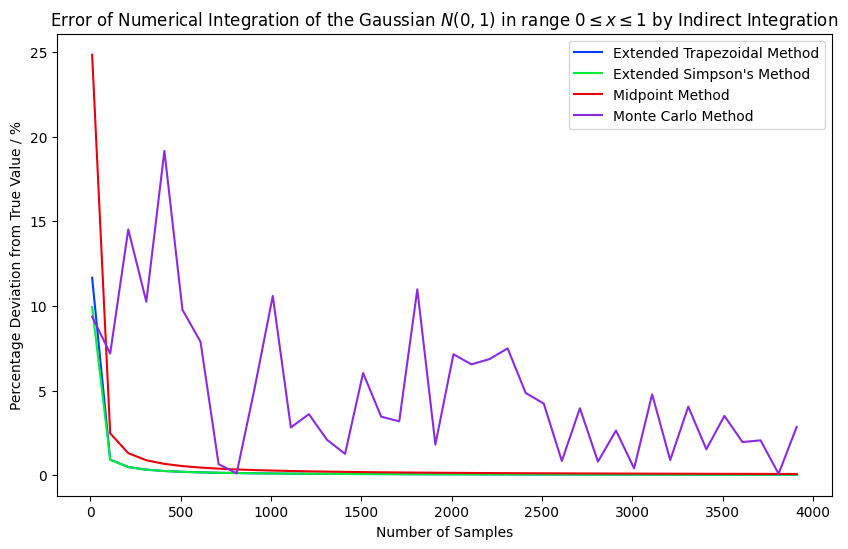

In [12]:
plt.figure(figsize = (10,6))
plt.plot(samples, t_err_i, label = 'Extended Trapezoidal Method')
plt.plot(samples, s_err_i, label = 'Extended Simpson\'s Method')
plt.plot(samples, m_err_i, label = 'Midpoint Method')
plt.plot(samples, mc_err_i, label = 'Monte Carlo Method')
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Deviation from True Value / %')
plt.legend()
#plt.xlim(0,1000)
#plt.ylim(0,5)
plt.title('Error of Numerical Integration of the Gaussian $N(0,1)$ in range $0 \leq x \leq 1$ by Indirect Integration')
plt.show()


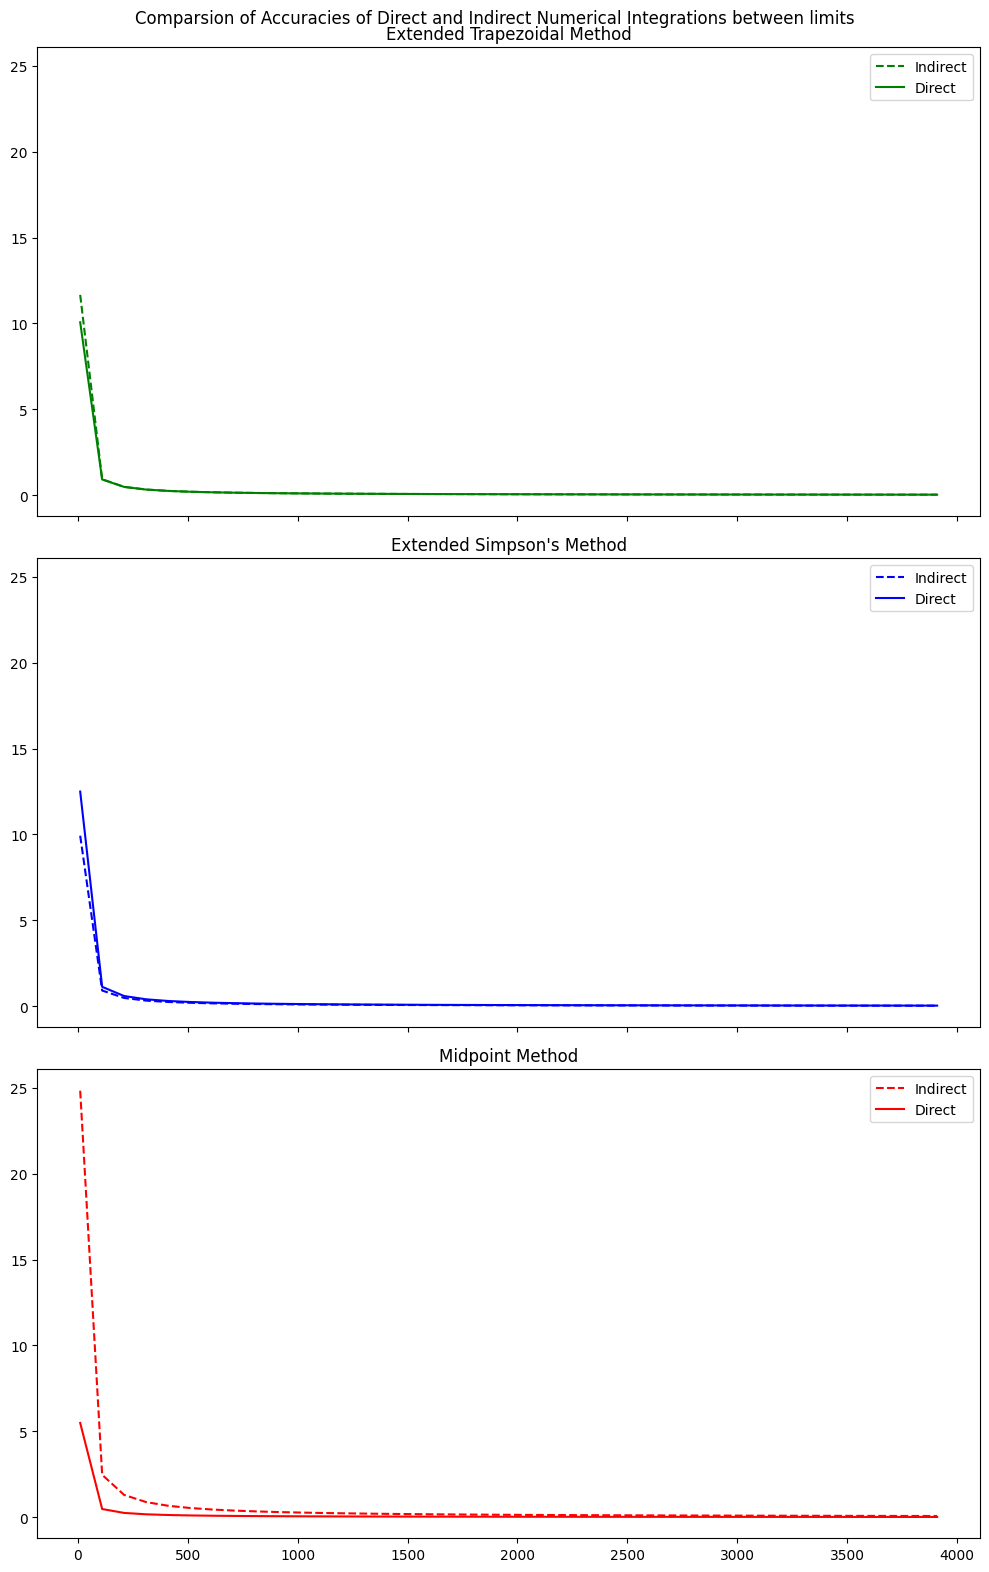

In [13]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize = (10,16))
fig.suptitle('Comparsion of Accuracies of Direct and Indirect Numerical Integrations between limits')
axs[0].plot(samples, t_err_i, '--', color = 'green', label = 'Indirect')
axs[0].plot(samples, t_err, '-', color = 'green', label = 'Direct')
axs[0].set_title('Extended Trapezoidal Method')
axs[0].legend(loc="upper right")

axs[1].plot(samples, s_err_i, '--', color = 'blue', label = 'Indirect')
axs[1].plot(samples, s_err, '-', color = 'blue', label = 'Direct')
axs[1].set_title('Extended Simpson\'s Method')
axs[1].legend(loc="upper right")

axs[2].plot(samples, m_err_i, '--', color = 'red', label = 'Indirect')
axs[2].plot(samples, m_err, '-', color = 'red', label = 'Direct')
axs[2].set_title('Midpoint Method')
axs[2].legend(loc="upper right")

plt.tight_layout()
plt.savefig('Accuracy Comparison')
plt.show()


### Investigate over a range of possible values for a, keeping the width of each sample size the same

In [26]:
a_vals = np.linspace(0,5,41)[1:]

mu = 0
sigma = 1
amp = 1
sample_density = 1000 # number of samples: set density of samples = 400*a

true_vals = [0.5*math.erf(i/np.sqrt(2)) for i in a_vals]

trapezium = [Extended_Trapezoidal(Gaussian, (0,i), int(sample_density*i), [mu, sigma, amp]) for i in a_vals]
t_err = [abs(trapezium[i] - true_vals[i])/true_vals[i] for i in range(len(trapezium))]

simpsons = [Extended_Simpsons(Gaussian, (0,i), int(sample_density*i), [mu, sigma, amp]) for i in a_vals]
s_err = [abs(simpsons[i] - true_vals[i])/true_vals[i] for i in range(len(simpsons))]

midpoint = [Midpoint(Gaussian, (0,i), int(sample_density*i), [mu, sigma, amp]) for i in a_vals]
m_err = [abs(midpoint[i] - true_vals[i])/true_vals[i] for i in range(len(midpoint))]

MC = [Monte_Carlo_Integration_Gaussian(i*sample_density, x_range = (0,i), params = [0,1,1]) for i in a_vals]
MC_val = [i[0] for i in MC]
MC_error = [i[1] for i in MC]
MC_val_err = [abs(MC_val[i] - true_vals[i])/true_vals[i] for i in range(len(MC_val))]

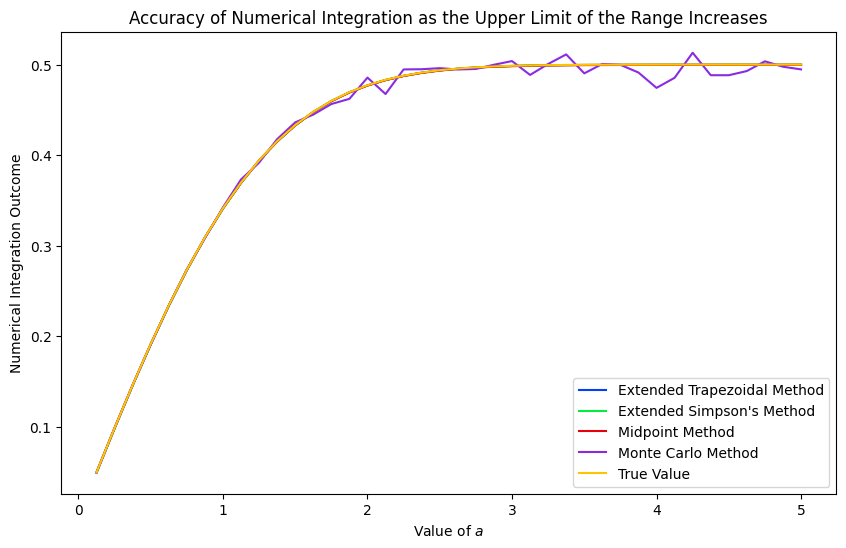

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(a_vals, trapezium, label = 'Extended Trapezoidal Method')
plt.plot(a_vals, simpsons, label = 'Extended Simpson\'s Method')
plt.plot(a_vals, midpoint, label = 'Midpoint Method')
plt.plot(a_vals, MC_val, label = 'Monte Carlo Method')
plt.plot(a_vals, true_vals, label = 'True Value')
plt.legend()
plt.xlabel('Value of $a$')
plt.ylabel('Numerical Integration Outcome')
plt.title('Accuracy of Numerical Integration as the Upper Limit of the Range Increases')

plt.show()

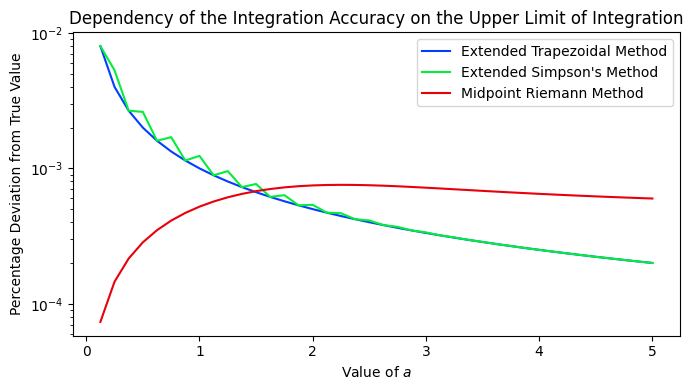

In [28]:
plt.figure(figsize = (7,4))
plt.plot(a_vals, t_err, label = 'Extended Trapezoidal Method')
plt.plot(a_vals, s_err, label = 'Extended Simpson\'s Method')
plt.plot(a_vals, m_err, label = 'Midpoint Riemann Method')
# plt.plot(a_vals, MC_val_err, label = 'Monte Carlo Method')

plt.legend()
#plt.ylim(0,0.001)
plt.xlabel('Value of $a$')
plt.ylabel('Percentage Deviation from True Value')
plt.yscale('log')
plt.title('Dependency of the Integration Accuracy on the Upper Limit of Integration')
plt.savefig('Dependency of Accuracy on Upper Limit of Integration')
plt.tight_layout()
plt.show()

## Investigation: at what value of a does the Midpoint Method become more inaccurate than the Extended Simpson's/Trapezoidal Method? Is this sample density dependent?
### Ignoring Monte Carlo Method


In [13]:
a_vals = np.linspace(0,5,41)[1:]

mu = 0
sigma = 1
amp = 1
sample_densities = [i for i in range(0,4800,100)][1:] # total number of samples = sample_densitites*i

true_vals = [0.5*math.erf(i/np.sqrt(2)) for i in a_vals]

a_intersect = []

for i in range(len(sample_densities)):
    trapezium = [Extended_Trapezoidal(Gaussian, (0,j), int(sample_densities[i]*j), [mu, sigma, amp]) for j in a_vals]
    t_err = [abs(trapezium[k] - true_vals[k])/true_vals[k] for k in range(len(trapezium))]

    simpsons = [Extended_Simpsons(Gaussian, (0,j), int(sample_densities[i]*j), [mu, sigma, amp]) for j in a_vals]
    s_err = [abs(simpsons[k] - true_vals[k])/true_vals[k] for k in range(len(simpsons))]

    midpoint = [Midpoint(Gaussian, (0,j), int(sample_densities[i]*j), [mu, sigma, amp]) for j in a_vals]
    m_err = [abs(midpoint[k] - true_vals[k])/true_vals[k] for k in range(len(midpoint))]

    for m in range(len(midpoint)):
        if m_err[m] >= s_err[m] and m_err[m] >= t_err[m]:
            a_intersect.append((sample_densities[i], a_vals[m]))
            break
        else:
            pass

print('The following list contains the limit at which the midpoint method is less accurate than simpsons/trapezoidal in the form (sample density, intersection)')
print(a_intersect) # this outputs a list of tuples, the first element is the sample density, and the second element is the valud of a at which the midpoint accurate is no longer the most inaccurate choice.

[(100, 1.625), (200, 1.625), (300, 1.625), (400, 1.625), (500, 1.625), (600, 1.625), (700, 1.625), (800, 1.625), (900, 1.625), (1000, 1.625), (1100, 1.625), (1200, 1.625), (1300, 1.625), (1400, 1.625), (1500, 1.625), (1600, 1.625), (1700, 1.625), (1800, 1.625), (1900, 1.625), (2000, 1.625), (2100, 1.625), (2200, 1.625), (2300, 1.625), (2400, 1.625), (2500, 1.625), (2600, 1.625), (2700, 1.625), (2800, 1.625), (2900, 1.625), (3000, 1.625), (3100, 1.625), (3200, 1.625), (3300, 1.625), (3400, 1.625), (3500, 1.625), (3600, 1.625), (3700, 1.625), (3800, 1.625), (3900, 1.625), (4000, 1.625), (4100, 1.625), (4200, 1.625), (4300, 1.625), (4400, 1.625), (4500, 1.625), (4600, 1.625), (4700, 1.625)]


In [10]:
def Gaussian_Integration(a, params):
    '''
    a - upper limit of integration
    '''
    # Determine the method to use from the value of a: this is limited to the range 0 < a < 5
    # Determine the minimum sample density that optimises operating time (i.e. increase the number of samples until the decrease in error is less than 0.00001%)
    # Determine use of direct / indirect integration dependent on the method chosen for the operation
    sample_densities = [i for i in range(0,8400,400)][1:]
    true_value = 0.5*math.erf(a/np.sqrt(2))

    if a <= 1.625: # use midpoint method
        midpoint_vals = [Midpoint(Gaussian, (0,a), int(i*a), params) for i in sample_densities]
        midpoint_accuracies = [abs(i - true_value)/true_value for i in midpoint_vals] # as a percentage deviation from the true_value
        error = 1
        index = 0
        while error > 0.00005: # find the point at which the error does not decrease more than 0.0001% by increasing sample density -> do this by iterating through the densities list
            error = abs(midpoint_accuracies[index + 1] - midpoint_accuracies[index])
            #print(error)
            index += 1
        #print(index, midpoint_vals[index], midpoint_accuracies[index])
        return midpoint_vals[index + 1]
        
    else: # use extended trapezoidal method
        trap_vals = [Extended_Trapezoidal(Gaussian, (0,a), int(i*a), params) for i in sample_densities]
        trap_accuracies = [abs(i - true_value)/true_value for i in trap_vals]
        error = 1
        index = 0
        while error > 0.00005:
            error = abs(trap_accuracies[index + 1] - trap_accuracies[index])
            #print(error)
            index += 1
        #print(index, trap_vals[index], trap_accuracies[index])
        return trap_vals[index + 1]

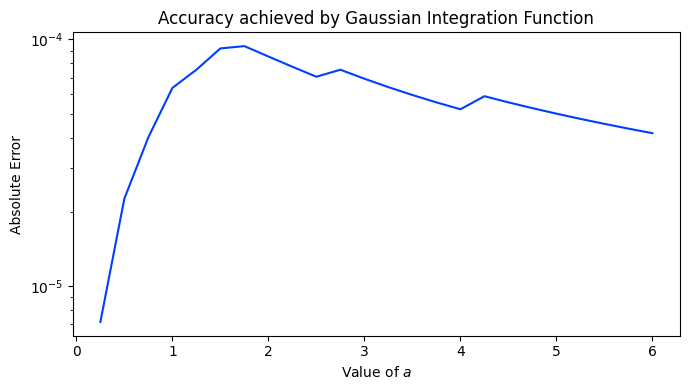

In [9]:
a_vals = np.linspace(0, 6, 25)[1:]
true_vals = [0.5*math.erf(i/np.sqrt(2)) for i in a_vals]
integrals = [Gaussian_Integration(a = i, params = [0,1,1]) for i in a_vals]

#errors = [abs(integrals[i] - true_vals[i])/true_vals[i] for i in range(len(a_vals))]
errors = [abs(integrals[i] - true_vals[i]) for i in range(len(a_vals))] # absolute error

plt.figure(figsize=(7,4))
plt.plot(a_vals, errors)
plt.xlabel('Value of $a$')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.title('Accuracy achieved by Gaussian Integration Function')
plt.savefig('Gaussian Integration Function Accuracy')
plt.tight_layout()
plt.show()


In [87]:
print([(a_vals[i],errors[i]) for i in range(len(errors))])
print('This contains the error from the integrator at each value of a')

[(0.25, 7.16104287741548e-06),
 (0.5, 2.2641027131675706e-05),
 (0.75, 4.0108092055679556e-05),
 (1.0, 6.353476606646424e-05),
 (1.25, 7.531278135658459e-05),
 (1.5, 9.187486662121103e-05),
 (1.75, 9.386708338043892e-05),
 (2.0, 8.522433869656565e-05),
 (2.25, 7.742544607819424e-05),
 (2.5, 7.054194223177213e-05),
 (2.75, 7.53064583300933e-05),
 (3.0, 6.925715098932139e-05),
 (3.25, 6.402868194804734e-05),
 (3.5, 5.949615977635103e-05),
 (3.75, 5.5545750545171746e-05),
 (4.0, 5.208004199064309e-05),
 (4.25, 5.8822276163661424e-05),
 (4.5, 5.555517953681477e-05),
 (4.75, 5.263147238276922e-05),
 (5.0, 4.999997148669166e-05),
 (5.25, 4.761904042488441e-05),
 (5.5, 4.5454543740830466e-05),
 (5.75, 4.347826048295422e-05),
 (6.0, 4.1666666585449263e-05)]

## Section 4: Expected Higgs signal significance based on average values

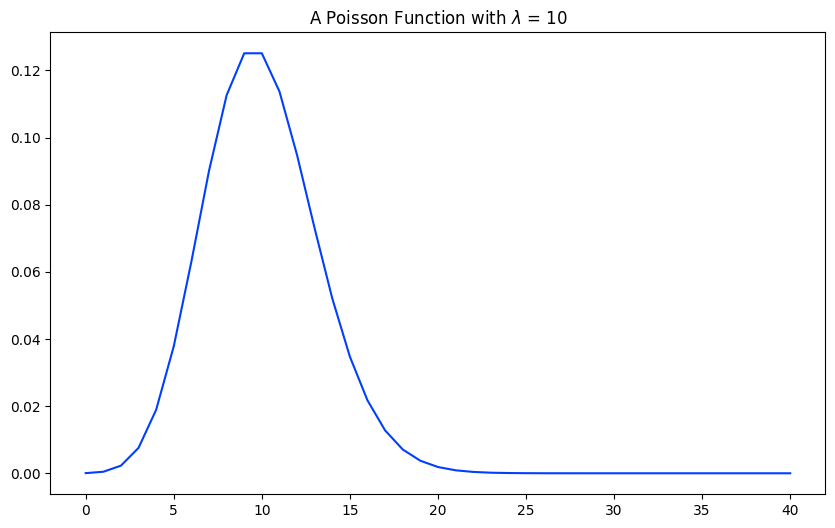

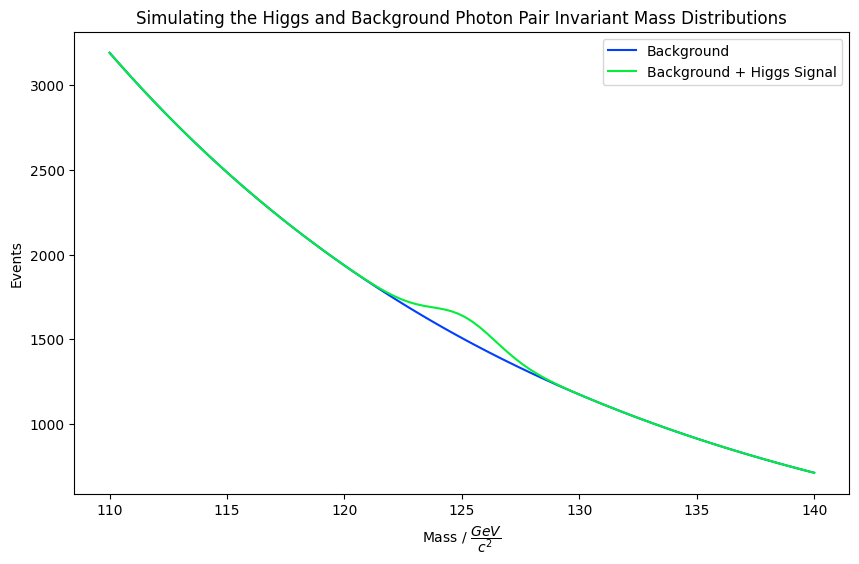

In [11]:
# definition of some functions used in the determination of the value of S

def B(m, m_h, k, A):
    return A*np.exp(-(m-m_h)/k)

def Poisson(x, mean):
    return (np.exp(-mean)*(mean**x))/math.factorial(x)

xx = np.linspace(0,40,41)
yy = [Poisson(int(i), 10) for i in xx]

plt.figure(figsize=(10,6))
plt.plot(xx,yy)
plt.title('A Poisson Function with $\lambda$ = 10')
plt.show()

x_b = np.linspace(110,140,100) # mass range over which we consider
y_b = np.array([470*Gaussian(i, 125.1, 1.4, 1) for i in x_b])
yy_b = np.array([B(i, 125.1, 20, 1500) for i in x_b])

plt.figure(figsize=(10,6))
#plt.plot(x_b, y_b)
plt.plot(x_b, yy_b, label = 'Background')
plt.plot(x_b, y_b + yy_b, label = 'Background + Higgs Signal')
plt.legend()
plt.xlabel('Mass / $\dfrac{GeV}{c^2}$')
plt.ylabel('Events')
plt.title('Simulating the Higgs and Background Photon Pair Invariant Mass Distributions')
plt.savefig('Simulating Higgs and Background Photon Invariant Mass Distributions')
plt.show()

In [12]:
def S(m_l, m_u): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    sample = number of samples
    '''
    nh = 470*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return nh/np.sqrt(nb)


## Study the dependence of the significance on the mass cuts

### Consider the dependency of S on the range covered, with selection cuts centred on the 125.1

In [33]:
# Range for consideration: 110 < m < 140

m_l = np.linspace(110, 125.0, 60)[::-1]
m_u = np.linspace(125.2, 140.2, 60)
m_diff = [m_u[i] - m_l[i] for i in range(len(m_l))]
s_vals = [S(m_l[i],m_u[i]) for i in range(len(m_l))]

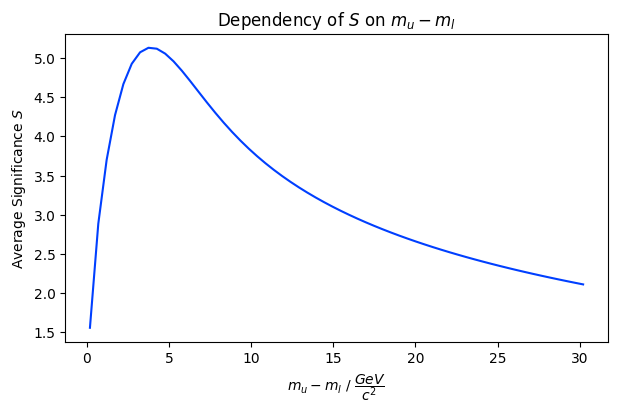

In [34]:
plt.figure(figsize = (7,4))
plt.plot(m_diff, s_vals)
plt.ylabel('Average Significance $S$')
plt.xlabel('$m_u - m_l$ / $\dfrac{GeV}{c^2}$')
plt.title('Dependency of $S$ on $m_u - m_l$')
plt.savefig('Dependency of S on selection cut range')
plt.show()

## Maximising S

In [35]:
# Create contour plot

m_l = np.arange(114, 125, 0.25)
m_u = np.arange(125, 136, 0.25)
s_val = []
for i in range(len(m_u)):
    s_val.append([S(j, m_u[i]) for j in m_l])
    print('Progress',i/len(m_u))

#plt.figure(figsize = (10,6))
#CS = plt.contour(m_l, m_u, s_val, cmap=cm.coolwarm)
#plt.clabel(CS, inline = 1, fontsize = 10)
#plt.xlabel('$m_l$')
#plt.ylabel('$m_u$')
#plt.title('Average Significance $S$ Contour Plot')
#plt.savefig('S Contour plot')
#plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [36]:
maxs = []
for i in range(len(s_val)):
    maxs.append(max(s_val[i]))

print('The maximum value of S is', max(maxs))

The maximum value of S is 5.140046083382359


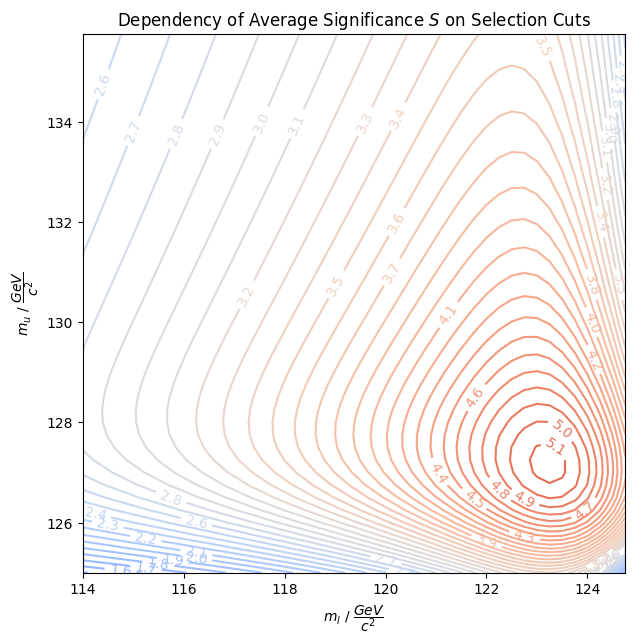

In [53]:
levels = np.linspace(0,6,61)

plt.figure(figsize = (7,7))
CS = plt.contour(m_l, m_u, s_val, levels, cmap=cm.coolwarm)
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlabel('$m_l$ / $\dfrac{GeV}{c^2}$')
plt.ylabel('$m_u$ / $\dfrac{GeV}{c^2}$')
plt.title('Dependency of Average Significance $S$ on Selection Cuts')
plt.savefig('Dependency of S Contour plot')
plt.show()

In [13]:
def S_minimise(m_l, m_u): # function returns -ve S, used for minimisation
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    sample = number of samples
    '''
    nh = 470*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return -nh/np.sqrt(nb)

In [14]:
def FDS_S(m_l, m_u): # forward difference scheme to find gradient for function minimisation
    del_l = (S_minimise(m_l + 0.00001*m_l, m_u) - S_minimise(m_l, m_u))/(0.00001*m_l)
    del_u = (S_minimise(m_l, m_u + 0.00001*m_u) - S_minimise(m_l, m_u))/(0.00001*m_u)
    return np.array([del_l, del_u])

In [15]:
def Gradient_Descent_S(alpha, x_0):
    '''
    alpha - learning rate
    x_0 - initial guess, should be a 2D array [m_u, m_l]
    '''

    tolerance = 1e-7 # tolerance is 1 keV/c^2    
    current_x = x_0.copy()
    #print(x)
    prev_x = x_0 - 1000000*tolerance
    #print(prev_x)

    change = -1

    #while change < 0 and abs(change) > tolerance:
    while change < 0 and abs(current_x[0] - prev_x[0]) > tolerance and abs(current_x[1] - prev_x[1]) > tolerance:
        prev_x = current_x.copy()
        gradient = FDS_S(prev_x[0], prev_x[1])
        current_x = prev_x - alpha * gradient
        print('Gradient',gradient)

        change = S_minimise(current_x[0],current_x[1]) - S_minimise(prev_x[0],prev_x[1])
        
        print(current_x[0],current_x[1], S(current_x[0],current_x[1]))
        #plt.plot(x[0],x[1], 'b.')
    
    return current_x, S(current_x[0],current_x[1])

In [33]:
Gradient_Descent_S(0.001, np.array([123.23642, 127.15795]))

[-0.00020399  0.00038792]
123.23642020398508 127.15794961208027 5.142343015380029
[-0.00020389  0.00038773]
123.23642040787584 127.15794922434718 5.142343015383506
[-0.0002038   0.00038755]
123.23642061167241 127.15794883680074 5.142343015386911
[-0.0002037   0.00038736]
123.23642081537479 127.15794844944082 5.142343015390321
[-0.00020361  0.00038717]
123.23642101898298 127.15794806226731 5.142343015393552
[-0.00020351  0.00038699]
123.23642122249709 127.15794767528013 5.142343015396679
[-0.00020342  0.0003868 ]
123.23642142591716 127.15794728847922 5.142343015399789
[-0.00020333  0.00038661]
123.2364216292432 127.15794690186442 5.142343015402736
[-0.00020323  0.00038643]
123.23642183247529 127.15794651543575 5.142343015405637
[-0.00020314  0.00038624]
123.2364220356134 127.15794612919305 5.142343015408397
[-0.00020304  0.00038606]
123.2364222386577 127.15794574313628 5.142343015411142
[-0.00020295  0.00038587]
123.23642244160811 127.15794535726526 5.142343015413741
[-0.00020286  0.000

(array([123.23642869, 127.15793349]), 5.142343015451456)

## Minimisation using Parabolic Method

In [34]:
# x = mu, y = ml
x = [123, 124, 125]
y = [126, 127, 128]
i = 0

while i < 30:
    x3 = 0.5*( (x[2]**2 - x[1]**2) * S_minimise(x[0], y[0]) + (x[0]**2 - x[2]**2) * S_minimise(x[1], y[0]) + (x[1]**2 - x[0]**2) * S_minimise(x[2], y[0]))/((x[2] - x[1]) * S_minimise(x[0], y[0]) + (x[0] - x[2]) * S_minimise(x[1], y[0]) + (x[1] - x[0]) * S_minimise(x[2], y[0]))
    
    x.append(x3)
    x_res = [S_minimise(i, y[0]) for i in x]
    del(x[x_res.index(max(x_res))])
    
    y3 = 0.5*( (y[2]**2 - y[1]**2) * S_minimise(x[0], y[0]) + (y[0]**2 - y[2]**2) * S_minimise(x[0], y[1]) + (y[1]**2 - y[0]**2) * S_minimise(x[0], y[2]))/((y[2] - y[1]) * S_minimise(x[0], y[0]) + (y[0] - y[2]) * S_minimise(x[0], y[1]) + (y[1] - y[0]) * S_minimise(x[0], y[2]))
    
    y.append(y3)
    y_res = [S_minimise(x[0], i) for i in y]
    del(y[y_res.index(max(y_res))])
    # print(x3, y3, S_minimise(x3, y3))


123.2441268661362 127.2222515560714 -5.141235754745577
123.23746919796429 127.15533771888614 -5.142341810992927
123.23749310347115 127.15798645578509 -5.142343317886114
123.23669773283099 127.15927589382069 -5.142342651948043
123.23669773283099 127.15866903873942 -5.142343350279342
123.23669773283099 127.15826429326867 -5.142343276383157


KeyboardInterrupt: 

## 5. Observed Higgs Signal Significance

In [16]:
# write function to find N_B and N_H

def N(m_l, m_u): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    '''
    nh = 470*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return nb, nh


In [42]:
nb, nh = N(m_l =  123.23642652908411, m_u = 127.15795031233415)

x_b = np.linspace(0, 7000, 1000)
x_m = x_b.copy()

y_b = Gaussian(x_b, mu = nb, sigma = np.sqrt(nb), A = 1)
y_m = Gaussian(x_m, mu = nb + nh, sigma = np.sqrt(nb + nh), A = 1)
#y_m = Gaussian(x_m, mu = nb + 470, sigma = np.sqrt(nb), A = 1)

x_fill = np.array([i for i in x_m if i >= (nb + 5*np.sqrt(nb))])
y_fill = np.array([y_m[i] if x_m[i] >= (nb + 5*np.sqrt(nb)) else None for i in range(len(x_m))])
y_fill_filtered = list(filter(lambda item: item is not None, y_fill))

plt.figure(figsize = (7,4))
plt.plot(x_b, y_b, lw = 0.75, label = 'Background Signal, G($\mu = N_B$, $\sigma = \sqrt{N_B}$)')
plt.plot(x_m, y_m, lw = 0.75, color = 'green', label = 'Measured Signal, G($\mu = N_B + 470$, $\sigma = \sqrt{N_B}$)')
plt.axvline(x = (nb + 5*np.sqrt(nb)), lw = 0.5, color = 'gray', linestyle = '--', label = 'N = $N_B + 5 \sigma$')
plt.xlim(4000, 7000)
plt.xlabel('Number of $\gamma \gamma$ Detected')
plt.ylabel('Probability of Measurement')
plt.title('Simulation of Statistical Fluctuation of Measurement')
plt.fill_between(x_fill, y1 = y_fill_filtered, color = 'green', alpha = 0.4)
plt.legend()
plt.savefig('Simulation of Statistical Fluctuation of Measurement')
plt.plot()

probability = Gaussian_Integration(7000 - (nb + 5*np.sqrt(nb)), params = [nb + nh - (nb + 5*np.sqrt(nb)), np.sqrt(nb + nh), 1])
print('The probability of measuring a five-sigma signal is: ', probability)

# 6. Checks on analysis inputs

## The Higgs mass is known to ±0.2 GeV/c^2

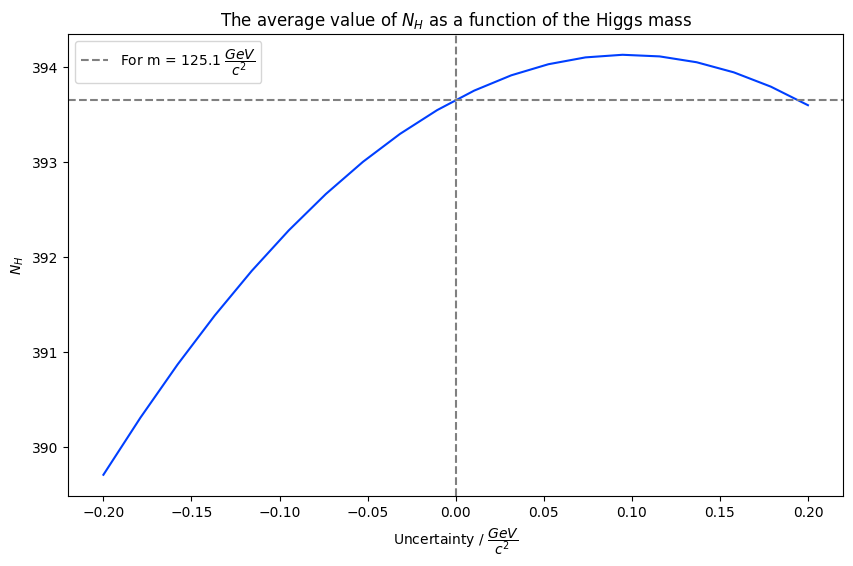

In [92]:
def N_mass(m_l, m_u, uncertainty): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    '''
    nh = 470*Gaussian_Integration((m_u - m_l), [(125.1+uncertainty) - m_l, 1.4, 1])
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1+uncertainty, 20, 1500]) # use sample density of 500 per unit x
    return nb, nh

uncertainties = np.linspace(-0.2, 0.2, 20)
nh_values = [N_mass(123.23642652908411, 127.15795031233415, i)[1] for i in uncertainties]

plt.figure(figsize = (10,6))
plt.plot(uncertainties, nh_values)
plt.axhline(y = 393.65503530368915, color = 'gray', linestyle = '--', label = 'For m = 125.1 $\dfrac{GeV}{c^2}$')
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlabel('Uncertainty / $\dfrac{GeV}{c^2}$')
plt.ylabel('$N_H$')
plt.legend()
plt.title('The average value of $N_H$ as a function of the Higgs mass')
plt.savefig('The average value of N_H as a function of the Higgs mass')

In [98]:
print(393.65503530368915 - min(nh_values), 'This is the absolute error from an uncertainty on the Higgs mass')

3.9457553821667943 This is the absolute error from an uncertainty on the Higgs mass


## Photon Interaction Fraction

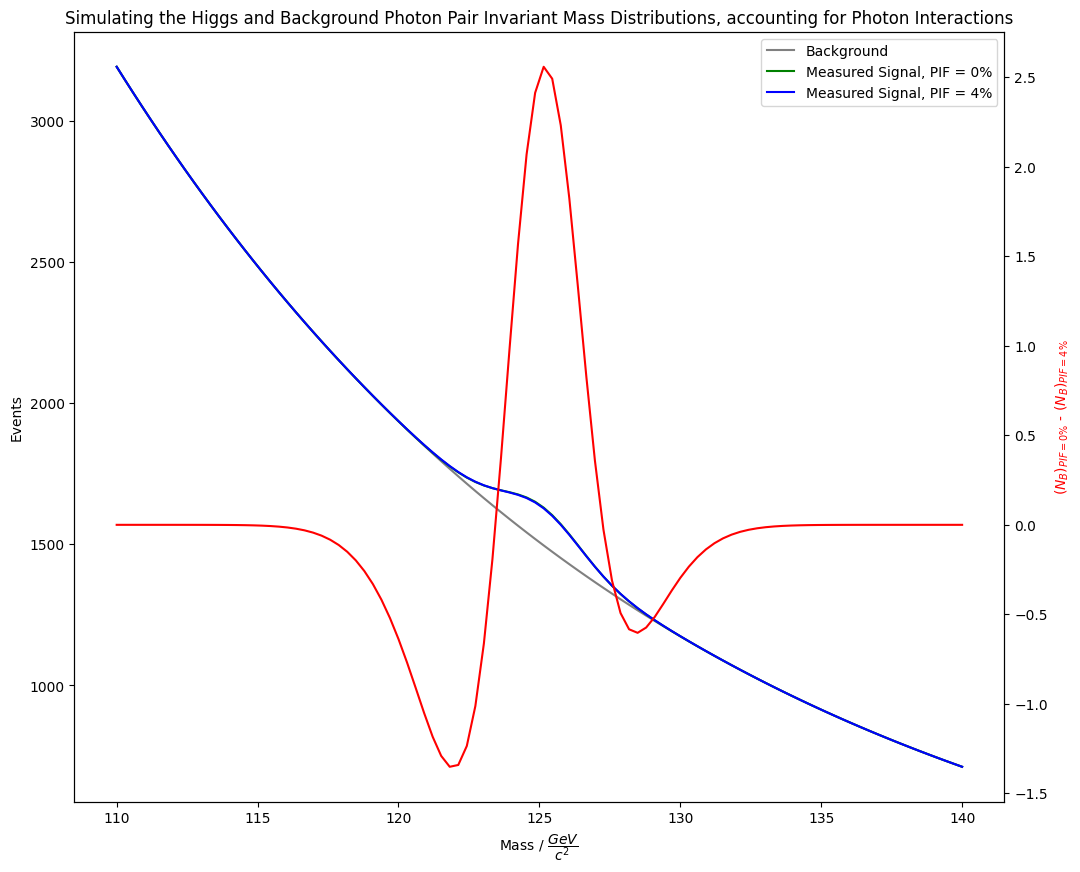

In [99]:
x_b = np.linspace(110,140,100) # mass range over which we consider
y_b = np.array([470*Gaussian(i, 125.1, 1.4, 1) for i in x_b])

y_b_unshifted = np.array([(470 - 470*0.04)*Gaussian(i, 125.1, 1.4, 1) for i in x_b])
y_b_shifted = np.array([(470*0.04)*Gaussian(i, 124.5, 2.6, 1) for i in x_b])
yy_b = np.array([B(i, 125.1, 20, 1500) for i in x_b])

fig, ax1 = plt.subplots(figsize=(12,10))
#plt.plot(x_b, y_b)
ax1.plot(x_b, yy_b, color = 'gray', label = 'Background')
ax1.plot(x_b, y_b + yy_b, color = 'green', label = 'Measured Signal, PIF = 0%')
ax1.plot(x_b, yy_b + y_b_unshifted + y_b_shifted, color = 'blue', label = 'Measured Signal, PIF = 4%')
#ax1.axvline(x = 125.1, linestyle = '--')
#ax1.axvline(x = 124.5, linestyle = '--')
combined_interaction = y_b_unshifted + y_b_shifted
combined_no_interaction = y_b

ax2 = ax1.twinx()
ax2.plot(x_b, combined_no_interaction - combined_interaction, color = 'red', label = '')
ax2.set_ylabel('$(N_B)_{PIF = 0\%}$ - $(N_B)_{PIF = 4\%}$', color = 'red')
ax1.legend()
ax1.set_xlabel('Mass / $\dfrac{GeV}{c^2}$')
ax1.set_ylabel('Events')
ax1.set_title('Simulating the Higgs and Background Photon Pair Invariant Mass Distributions, accounting for Photon Interactions')
plt.savefig('Simulating Higgs and Background Photon Invariant Mass Distributions, with Photon Interaction Fraction')
plt.show()

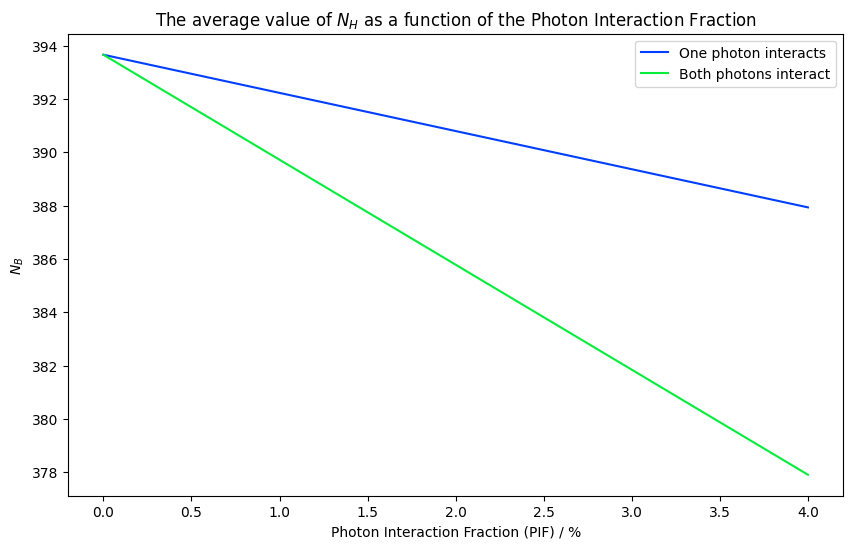

In [100]:
def N_interaction(m_l, m_u, interaction_fraction): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    '''
    percentage = interaction_fraction/100 # express fraction as a percentage multiplier
    total = 470
    shifted = total * percentage
    unshifted = total - shifted
    nh_unshifted = unshifted*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    nh_shifted = shifted*Gaussian_Integration((m_u - m_l), [124.5 - m_l, 2.6, 1])
    #print(nh_unshifted, nh_shifted)
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return nb, nh_unshifted,  nh_shifted

def N_annihilation(m_l, m_u, interaction_fraction): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    '''
    percentage = interaction_fraction/100 # express fraction as a percentage multiplier
    total = 470
    shifted = total * percentage
    unshifted = total - shifted
    nh_unshifted = unshifted*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    #nh_shifted = shifted*Gaussian_Integration((m_u - m_l), [124.5 - m_l, 2.6, 1])
    #print(nh_unshifted, nh_shifted)
    #nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return nb, nh_unshifted

interaction_fractions = np.linspace(0,4,20) # interaction percentage
nb_shifted_vals = [N_interaction(123.23642652908411,  127.15795031233415, i) for i in interaction_fractions]
nb_annihilation_vals = [N_annihilation(123.23642652908411,  127.15795031233415, i)[1] for i in interaction_fractions]
combined = [i[1]+i[2] for i in nb_shifted_vals]

plt.figure(figsize = (10,6))
plt.plot(interaction_fractions, combined, label = 'One photon interacts')
plt.plot(interaction_fractions, nb_annihilation_vals, label = 'Both photons interact')
plt.xlabel('Photon Interaction Fraction (PIF) / %')
plt.legend()
plt.ylabel('$N_B$')
plt.title('The average value of $N_H$ as a function of the Photon Interaction Fraction')
plt.savefig('The average value of $N_H$ as a function of the Photon Interaction Fraction')
plt.show()

In [102]:
print(393.65503530368915 - min(combined), 'This is the absolute error caused by photon interactions, ignoring annihilation effects')
print(393.65503530368915 - min(nb_annihilation_vals), 'This is the absolute error caused by photon interactions, considering 100% annihilation effects')

5.72328268379249 This is the absolute error caused by photon interactions, ignoring annihilation effects
15.74620141214757 This is the absolute error caused by photon interactions, considering 100% annihilation effects


## The theory predicting the number of Higgs bosons expected to be created at the LHC has a ±3% error.

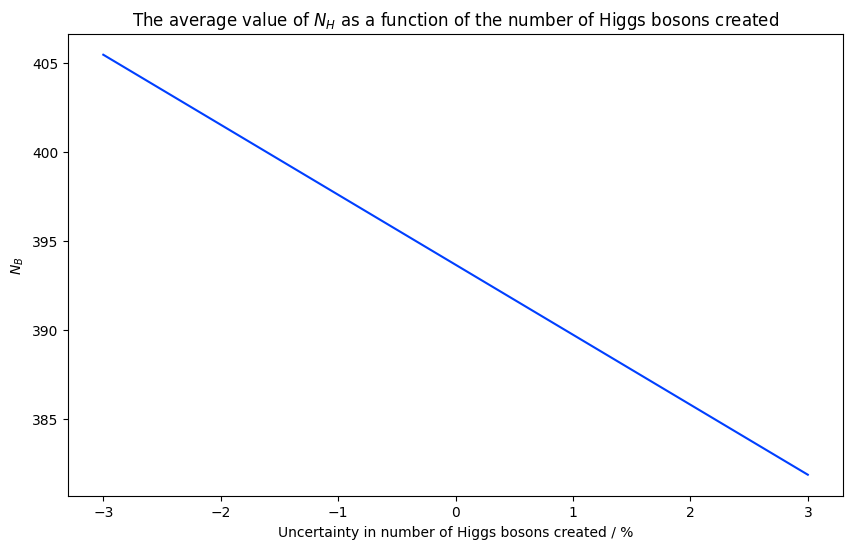

In [103]:
def N_number(m_l, m_u, uncertainty): # function returns the average significance of the Higgs excess
    '''
    m_l = lower selection cut
    m_u = upper selection cut
    '''
    nh = (470*(1-uncertainty/100))*Gaussian_Integration((m_u - m_l), [125.1 - m_l, 1.4, 1])
    nb = Extended_Trapezoidal(B, (m_l,m_u), int(500*(m_u - m_l)), params = [125.1, 20, 1500]) # use sample density of 500 per unit x
    return nb, nh

number_uncertainty_frac = np.linspace(-3, 3, 30) #
nb_number_vals = [N_number(123.23642652908411,  127.15795031233415, i)[1] for i in number_uncertainty_frac]

plt.figure(figsize=(10,6))
plt.plot(number_uncertainty_frac, nb_number_vals)
plt.xlabel('Uncertainty in number of Higgs bosons created / %')
plt.ylabel('$N_B$')
plt.title('The average value of $N_H$ as a function of the number of Higgs bosons created')
plt.savefig('The average value of $N_H$ as a function of the number of Higgs bosons created')
plt.show()

In [107]:
print(393.65503530368915 - min(nb_number_vals), 'This is the absolute error from uncertainties in number of Higgs boson created')

11.809651059110706 This is the absolute error from uncertainties in number of Higgs boson created


## Combine uncertainties

In [20]:
nb, nh = N(m_l = 123.23642652908411, m_u = 127.15795031233415)

sigma_n = 11.809651059110706
sigma_pif = 15.74620141214757
sigma_m = 3.9457553821667943

combined_unc = np.sqrt(sigma_n**2 + sigma_pif**2 + nb  + nh + sigma_m**2)

x_b = np.linspace(0, 7000, 1000)
x_m = x_b.copy()
x_m_0 = x_b.copy()

y_b = Gaussian(x_b, mu = nb, sigma = np.sqrt(nb), A = 1)
y_m = Gaussian(x_m, mu = nb + nh, sigma = combined_unc, A = 1)
y_m_0 = Gaussian(x_m, mu = nb + nh, sigma = np.sqrt(nb), A = 1)

x_fill = np.array([i for i in x_m if i >= (nb + 5*np.sqrt(nb))])
y_fill = np.array([y_m[i] if x_m[i] >= (nb + 5*np.sqrt(nb)) else None for i in range(len(x_m))])
y_fill_filtered = list(filter(lambda item: item is not None, y_fill))

probability = Gaussian_Integration(7000 - (nb + 5*np.sqrt(nb)), params = [nb + nh - (nb + 5*np.sqrt(nb)), (combined_unc), 1])
print('The probability of measuring a five-sigma signal is: ', probability)


The probability of measuring a five-sigma signal is:  0.554796283045957


[]

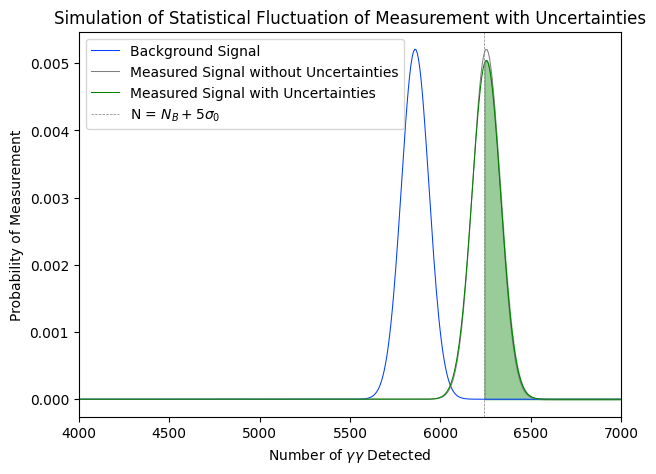

In [21]:
plt.figure(figsize = (7,5))
plt.plot(x_b, y_b, lw = 0.75, label = 'Background Signal')
plt.plot(x_m_0, y_m_0, lw = 0.75, color = 'gray', label = 'Measured Signal without Uncertainties')
plt.plot(x_m, y_m, lw = 0.75, color = 'green', label = 'Measured Signal with Uncertainties')
plt.axvline(x = (nb + 5*np.sqrt(nb)), lw = 0.5, color = 'gray', linestyle = '--', label = 'N = $N_B + 5 \sigma_0$')
plt.xlim(4000, 7000)
plt.xlabel('Number of $\gamma \gamma$ Detected')
plt.ylabel('Probability of Measurement')
plt.title('Simulation of Statistical Fluctuation of Measurement with Uncertainties')
plt.fill_between(x_fill, y1 = y_fill_filtered, color = 'green', alpha = 0.4)
plt.legend()
plt.savefig('Simulation of Statistical Fluctuation of Measurement with Uncertainties')
plt.plot()


### Consider the change in probability when using unoptimised selection cuts, here we have not considered the additional uncertainties

In [45]:
# 
m_l_vals = np.linspace(123.2320,123.2364,12)[::-1]
m_u_vals = np.linspace(127.1579,127.1623,12)

probabilities = []

for i in range(len(m_l_vals)):
    nb, nh = N(m_l = m_l_vals[i], m_u = m_u_vals[i])
    prob = Gaussian_Integration(7000 - (nb + 5*np.sqrt(nb)), params = [nb + nh - (nb + 5*np.sqrt(nb)), np.sqrt(nb), 1])
    probabilities.append(prob)
    #print(i, prob)

m_difference_mag = [np.linalg.norm([m_l_vals[i] - 123.23642652908411, m_u_vals[i] - 127.15795031233415]) for i in range(len(m_u_vals))]

In [46]:
mmin, mmax = min(m_difference_mag), max(m_difference_mag)
pfit = np.polyfit(m_difference_mag, probabilities, 1, cov =True)
print(pfit)

def poly_1d(x, m, c):
    return m*x + c

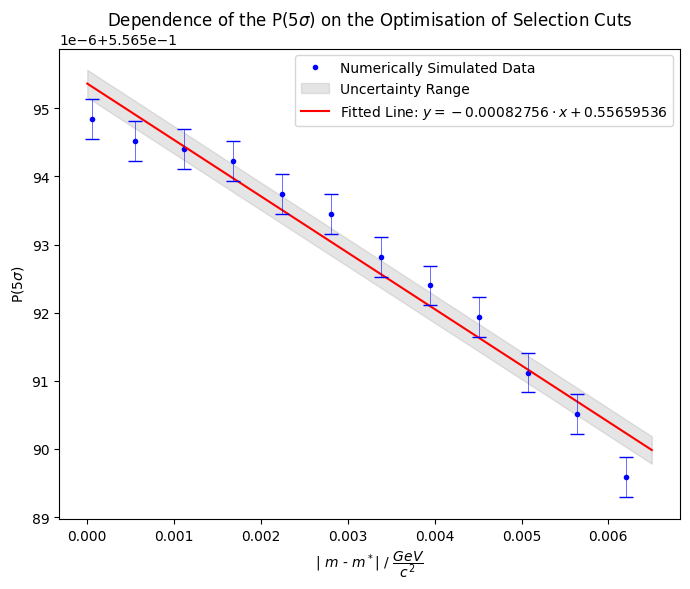

In [50]:
xx = np.linspace(0,0.0065,10)
unc_perc = 5.263147238276922e-07

plt.figure(figsize = (7,6))
plt.plot(m_difference_mag, probabilities,  '.', color = 'blue',label = 'Numerically Simulated Data')
plt.fill_between(xx, y1 = poly_1d(xx, pfit[0][0] - pfit[1][1][1], pfit[0][1] + np.sqrt(abs(pfit[1][1][1]))), y2 =poly_1d(xx, pfit[0][0] + pfit[1][1][1], pfit[0][1] - np.sqrt(abs(pfit[1][1][1]))), color = 'gray', alpha = 0.2, label = 'Uncertainty Range')
plt.plot(xx, poly_1d(xx, pfit[0][0], pfit[0][1]), color='red', label = 'Fitted Line: $y = -0.00082756 \cdot x + 0.55659536$')
plt.errorbar(m_difference_mag, probabilities, yerr = unc_perc*np.array(probabilities), color = 'blue', lw = 0.4, capsize = 5, linestyle = 'None')
plt.xlabel('| $m$ - $m^* |$ / $\dfrac{GeV}{c^2}$')
plt.ylabel('P$(5\sigma)$')
plt.title('Dependence of the P($5 \sigma$) on the Optimisation of Selection Cuts')
plt.legend()
plt.tight_layout()
plt.savefig('Investigation of the Dependence of five-sigma Measurement on the Optimisation of Selection Cuts')
plt.show()